In [1]:
using DataFrames
using Gadfly
using Cairo
using MIToS.PDB
using Compose
using Distributions
using HypothesisTests
set_default_plot_size(40cm, 14cm)

home = "/home/german/labo/16/Benchmarks_ANA/ndd_check"

"/home/german/labo/16/Benchmarks_ANA/ndd_check"

### Read volumes

In [13]:
# ANA 
filename_ana_vol = joinpath(home, "ana", "out_ndd")
ana_vol = convert(Array{Float64, 1}, readdlm(filename_ana_vol)[2:end, 2])
ana_vol = ana_vol .- ana_vol[5]

# Epock
filename_epo_vol = joinpath(home, "epock", "volume.dat")
epo_vol = convert(Array{Float64, 1}, readdlm(filename_epo_vol)[2:end, 2])
epo_vol = epo_vol .- epo_vol[5]

# POVME
filename_pov_vol = joinpath(home, "povme/output", "POVME_output.txt")
pov_vol = convert(Array{Float64, 1}, readdlm(filename_pov_vol)[end-length(ana_vol):end-1, 3])
pov_vol = pov_vol .- pov_vol[5]

# MDPocket
filename_mdp_vol = joinpath(home, "mdpocket", "mdpout_descriptors.txt")
mdp_vol = convert(Array{Float64, 1}, readdlm(filename_mdp_vol)[2:end, 2]);
mdp_vol = mdp_vol .- mdp_vol[5];

## Plots

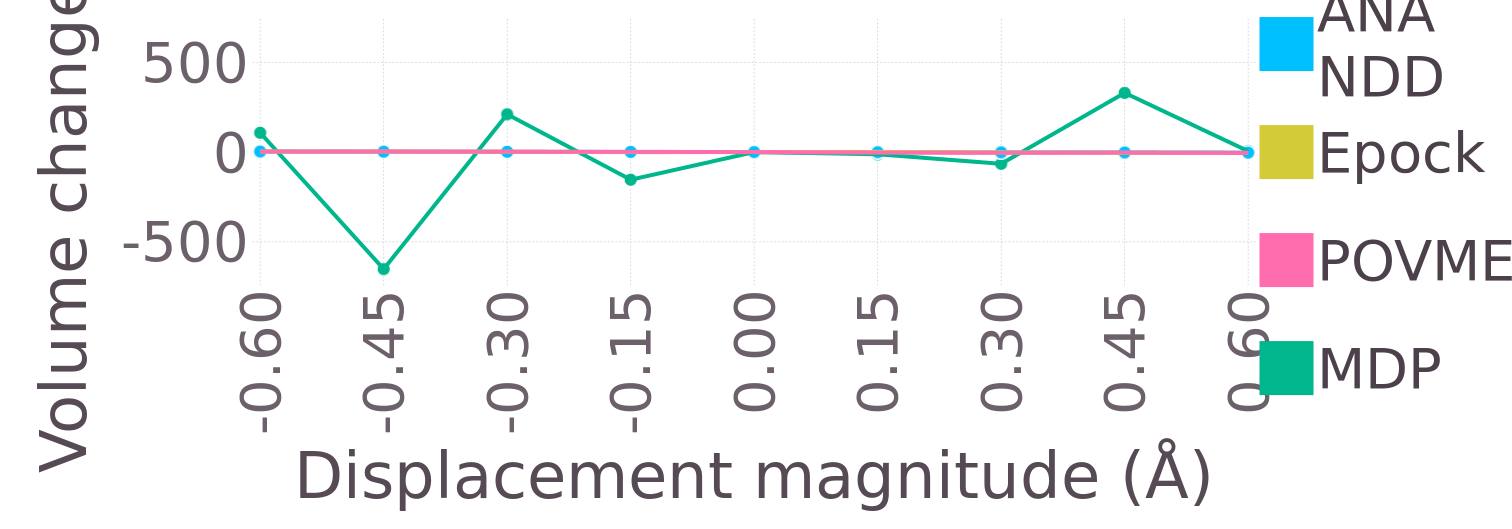

In [48]:
df_vol_a = DataFrame(Volume = [ ana_vol ; epo_vol ; pov_vol ; mdp_vol ],
    Displacement = repeat(collect(-.6:.15:.6), outer = [4]),
    Tool = repeat([ "ANA\nNDD" ; "Epock" ; "POVME" ; "MDP" ], inner = [length(ana_vol)]));

plot_fig_s3a = plot(df_vol_a, Geom.line, x = "Displacement", y = "Volume", color = "Tool", Geom.point,

Guide.xlabel("Displacement magnitude (Å)"), 
Guide.xticks(ticks = collect(-.6:.15:.6)),
Guide.ylabel("Volume change (Å<\sup>3</sup>)", orientation=:vertical),
Coord.cartesian(ymin = -700, ymax = 700),

Theme(line_width = 3pt, point_size = 5pt,
        minor_label_font_size = 42pt, major_label_font_size = 48pt,
        key_title_font_size=46pt, key_label_font_size=42pt))

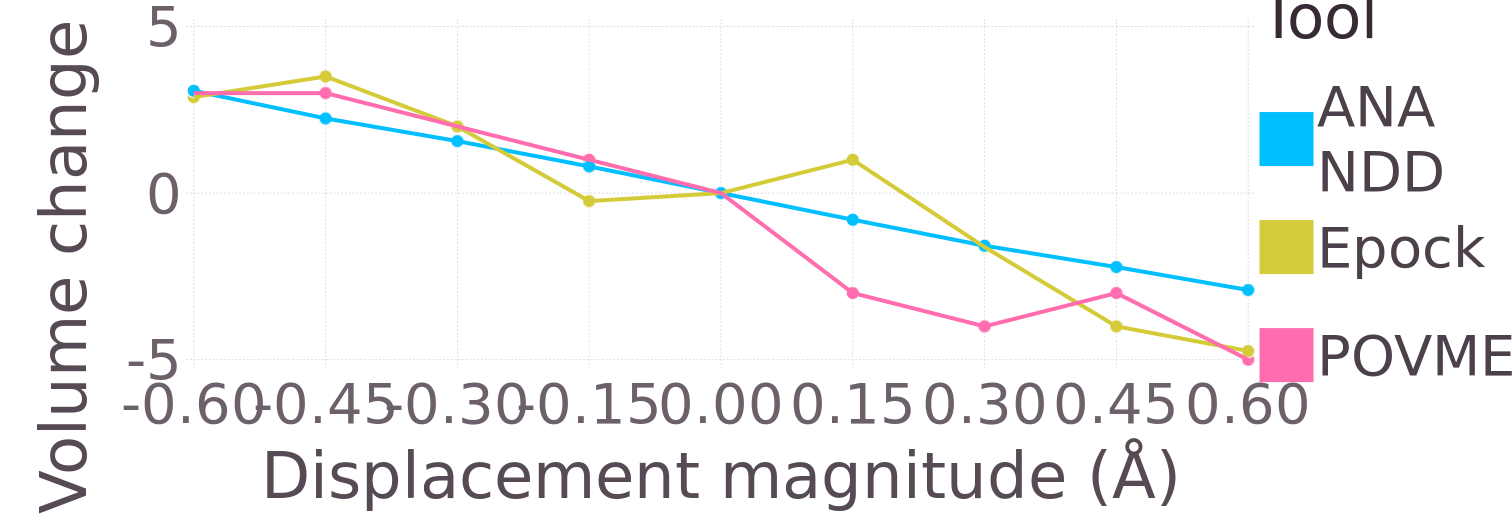

In [49]:
df_vol_b = DataFrame(Volume = [ ana_vol ; epo_vol ; pov_vol ],
    Displacement = repeat(collect(-.6:.15:.6), outer = [3]),
    Tool = repeat([ "ANA\nNDD" ; "Epock" ; "POVME" ], inner = [length(ana_vol)]));

plot_fig_s3b = plot(df_vol_b, Geom.line, x = "Displacement", y = "Volume", color = "Tool", Geom.point,

    Guide.xlabel("Displacement magnitude (Å)"), 
    Guide.xticks(ticks = collect(-.6:.15:.6)),
    Guide.ylabel("Volume change (Å<\sup>3</sup>)", orientation=:vertical),
    Coord.cartesian(xmin = -.6, xmax = .6),
    
    Theme(line_width = 3pt, point_size = 5pt,
        minor_label_font_size = 42pt, major_label_font_size = 48pt,
        key_title_font_size=46pt, key_label_font_size=42pt))

In [50]:
fig_out_filename = joinpath(home, "fig_si_3a.png")
draw(PNG(fig_out_filename, 60cm, 40cm), plot_fig_s3a)

fig_out_filename = joinpath(home, "fig_si_3b.png")
draw(PNG(fig_out_filename, 60cm, 40cm), plot_fig_s3b)